In [38]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [39]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [40]:
from dt.my_adaboost import AdaBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [41]:
def print_accuracy(y_pred, y_test):
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {test_accuracy}")

In [42]:
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
boost = AdaBoost()
boost.fit(X_train, y_train)

pred = boost.predict(X_test)
print_accuracy(pred, y_test)

Test Accuracy: 0.9210526315789473


In [43]:
import matplotlib.pyplot as plt

In [44]:
import optuna

In [51]:
def func(trial, X_train, X_val, y_train, y_val):
    n_estimators = trial.suggest_int('n_estimators', 2, 10)
    max_depth = trial.suggest_int('max_depth', 2, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    boost = AdaBoost(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
    )
    boost.fit(X_train, y_train)
    y_pred = boost.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

In [52]:
def get_best_hyperparameters(X_train, X_val, y_train, y_val):
    study = optuna.create_study(direction='maximize')
    study.optimize(
        func=lambda trial: func(trial, X_train, X_val, y_train, y_val),
        n_trials=100,
        show_progress_bar=True
    )
    best_params = study.best_params
    best_value = study.best_value
    return best_params, best_value


In [53]:
def get_split_data():
    data = load_breast_cancer()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    return X_test, X_train, X_val, y_test, y_train, y_val

In [57]:
def pretty_print_best(best_params, best_score):
    print(f"Best parameters: {best_params}")
    print(f"Best score: {best_score}")

In [58]:
X_test, X_train, X_val, y_test, y_train, y_val = get_split_data()
best_params, best_score = get_best_hyperparameters(X_train, X_val, y_train, y_val)
print("~" * 40)
pretty_print_best(best_params, best_score)

[I 2024-06-13 18:05:34,683] A new study created in memory with name: no-name-4da92914-079f-471b-aa39-378fb45b2aa5


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-06-13 18:05:34,723] Trial 0 finished with value: 0.9560439560439561 and parameters: {'n_estimators': 8, 'max_depth': 30, 'min_samples_split': 20, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.9560439560439561.
[I 2024-06-13 18:05:34,739] Trial 1 finished with value: 0.945054945054945 and parameters: {'n_estimators': 5, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.9560439560439561.
[I 2024-06-13 18:05:34,750] Trial 2 finished with value: 0.9120879120879121 and parameters: {'n_estimators': 4, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 26}. Best is trial 0 with value: 0.9560439560439561.
[I 2024-06-13 18:05:34,762] Trial 3 finished with value: 0.9340659340659341 and parameters: {'n_estimators': 3, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9560439560439561.
[I 2024-06-13 18:05:34,778] Trial 4 finished with value: 0.945054945054945 and parameters: {'n_es

In [67]:
def plot_accuracy_vs_n_estimators(
        X_test, X_train, X_val, y_test, y_train, y_val,
        max_depth,
        min_samples_split,
        min_samples_leaf,
        n_est_lst
):
    train_accuracies = []
    test_accuracies = []

    for n_est in n_est_lst:
        boost = AdaBoost(
            n_estimators=n_est,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
        )
        boost.fit(X_train, y_train)

        y_train_pred = boost.predict(X_train)
        train_accuracies.append(accuracy_score(y_train, y_train_pred))

        y_test_pred = boost.predict(X_test)
        test_accuracies.append(accuracy_score(y_test, y_test_pred))

    plt.plot(n_est_lst, train_accuracies, label='Train Accuracy')
    plt.plot(n_est_lst, test_accuracies, label='Test Accuracy')
    plt.xlabel('N_estimators')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs N_estimators')
    plt.legend()
    plt.show()

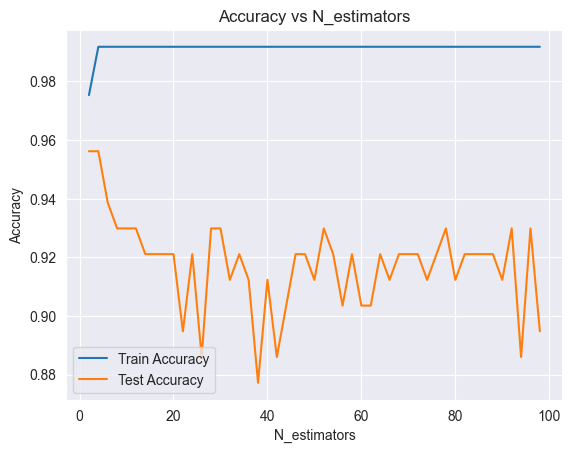

In [68]:
# n_est_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 25]
n_est_lst = [i for i in range(2, 100, 2)]
plot_accuracy_vs_n_estimators(
    X_test=X_test,
    X_train=X_train,
    X_val=X_val,
    y_test=y_test,
    y_train=y_train,
    y_val=y_val,
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    n_est_lst=n_est_lst
)

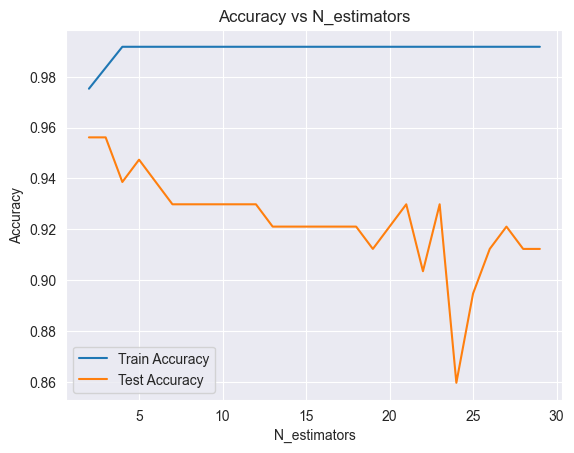

In [69]:
n_est_lst = [i for i in range(2, 30)]
plot_accuracy_vs_n_estimators(
    X_test=X_test,
    X_train=X_train,
    X_val=X_val,
    y_test=y_test,
    y_train=y_train,
    y_val=y_val,
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    n_est_lst=n_est_lst
)

In [70]:
from dt.my_random_forest import RandomForest

In [71]:
def func(trial, X_train, X_val, y_train, y_val):
    n_estimators = trial.suggest_int('n_estimators', 2, 10)
    max_depth = trial.suggest_int('max_depth', 2, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    random_forest = RandomForest(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
    )
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

In [72]:
def get_best_hyperparameters(X_train, X_val, y_train, y_val):
    study = optuna.create_study(direction='maximize')
    study.optimize(
        func=lambda trial: func(trial, X_train, X_val, y_train, y_val),
        n_trials=100,
        show_progress_bar=True
    )
    best_params = study.best_params
    best_value = study.best_value
    return best_params, best_value


In [73]:
X_test, X_train, X_val, y_test, y_train, y_val = get_split_data()
best_params, best_score = get_best_hyperparameters(X_train, X_val, y_train, y_val)
print("~" * 40)
pretty_print_best(best_params, best_score)

[I 2024-06-13 18:16:32,937] A new study created in memory with name: no-name-e3f6ec9a-6ab6-4c4b-82ec-1b9f8b7d2604


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-06-13 18:16:32,958] Trial 0 finished with value: 0.9010989010989011 and parameters: {'n_estimators': 4, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.9010989010989011.
[I 2024-06-13 18:16:32,980] Trial 1 finished with value: 0.9010989010989011 and parameters: {'n_estimators': 9, 'max_depth': 18, 'min_samples_split': 19, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.9010989010989011.
[I 2024-06-13 18:16:33,009] Trial 2 finished with value: 0.9010989010989011 and parameters: {'n_estimators': 7, 'max_depth': 29, 'min_samples_split': 25, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.9010989010989011.
[I 2024-06-13 18:16:33,041] Trial 3 finished with value: 0.9010989010989011 and parameters: {'n_estimators': 7, 'max_depth': 27, 'min_samples_split': 17, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9010989010989011.
[I 2024-06-13 18:16:33,052] Trial 4 finished with value: 0.8901098901098901 and parameters: {'n_

In [74]:
def plot_accuracy_vs_n_estimators(
        X_test, X_train, X_val, y_test, y_train, y_val,
        max_depth,
        min_samples_split,
        min_samples_leaf,
        n_est_lst
):
    train_accuracies = []
    test_accuracies = []

    for n_est in n_est_lst:
        random_forest = RandomForest(
            n_estimators=n_est,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
        )
        random_forest.fit(X_train, y_train)

        y_train_pred = random_forest.predict(X_train)
        train_accuracies.append(accuracy_score(y_train, y_train_pred))

        y_test_pred = random_forest.predict(X_test)
        test_accuracies.append(accuracy_score(y_test, y_test_pred))

    plt.plot(n_est_lst, train_accuracies, label='Train Accuracy')
    plt.plot(n_est_lst, test_accuracies, label='Test Accuracy')
    plt.xlabel('N_estimators')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs N_estimators')
    plt.legend()
    plt.show()

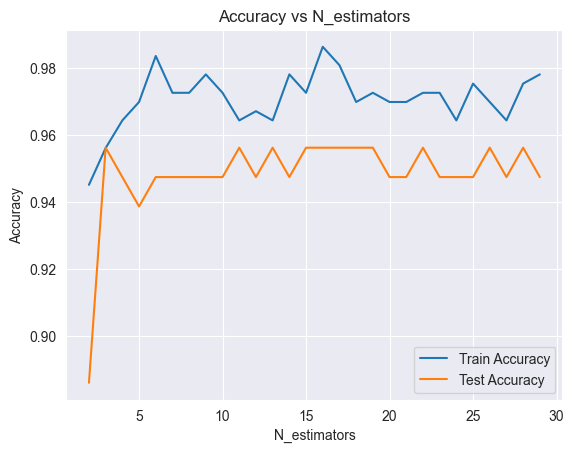

In [75]:
n_est_lst = [i for i in range(2, 30)]
plot_accuracy_vs_n_estimators(
    X_test=X_test,
    X_train=X_train,
    X_val=X_val,
    y_test=y_test,
    y_train=y_train,
    y_val=y_val,
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    n_est_lst=n_est_lst
)

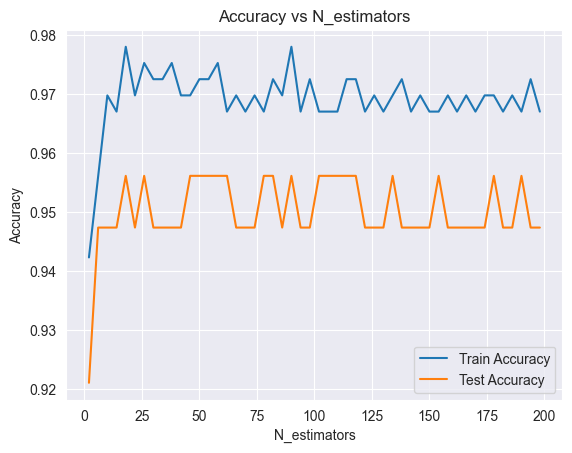

In [76]:
n_est_lst = [i for i in range(2, 200,4)]
plot_accuracy_vs_n_estimators(
    X_test=X_test,
    X_train=X_train,
    X_val=X_val,
    y_test=y_test,
    y_train=y_train,
    y_val=y_val,
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    n_est_lst=n_est_lst
)